In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    centroids = np.array([])
    if init_centroids == 'random':
        centroids = np.random.randint(256, size = (k_clusters, img_1d.shape[1]))
    elif init_centroids == 'in_pixels':
        centroids = img_1d[np.random.choice(img_1d.shape[0], size = k_clusters, replace=False)]
    
    iteration = 0
    prevCentroids = np.array([])
    labels = np.zeros(img_1d.shape[0])
    while iteration < max_iter and np.array_equal(centroids, prevCentroids) is False:
        prevCentroids = np.copy(centroids)
        for i in range(img_1d.shape[0]):
            labels[i] = np.argmin(np.linalg.norm(img_1d[i] - centroids, axis = 1), axis=0)
        for i in range(k_clusters):
            clusters = img_1d[np.where(labels == i)[0]]
            if np.any(clusters):
                newCent = np.mean(clusters, axis=0)
                centroids[i] = newCent

        iteration += 1
        
    return centroids, labels

Image path: test.jpg
Image name output: ptaideptrai
Save image as 'png' or 'pdf'? png


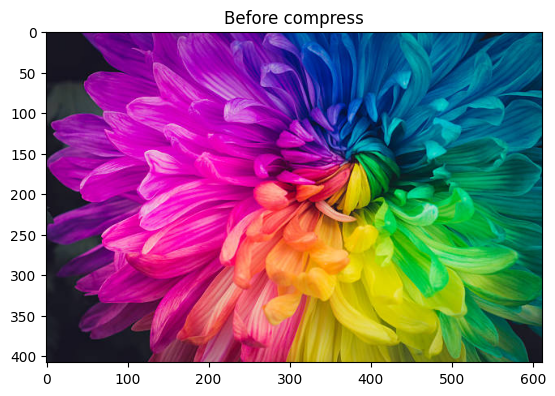

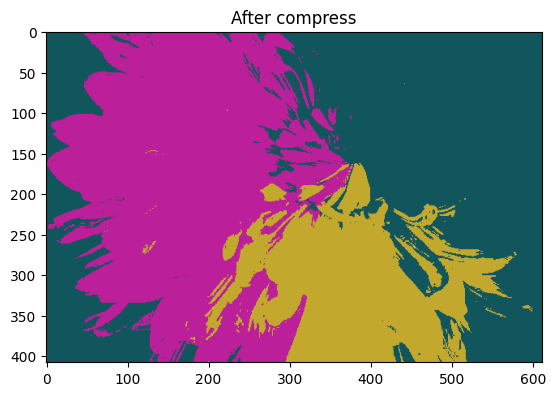

In [3]:
if __name__=="__main__":
    imgPath = input("Image path: ")
    img = Image.open(imgPath)
    imgNameOut = input("Image name output: ")
    imgType = input("Save image as 'png' or 'pdf'? ")
    img = img.convert("RGB")
    img = np.array(img)

    plt.figure()
    plt.title('Before compress')
    plt.imshow(img)
    plt.show()
    imgHeight, imgWidth, imgChannel = img.shape
    img = img.reshape(imgHeight*imgWidth, imgChannel)
    
    k_clusters = 3

    max_iter = 10

    centroids, labels = kmeans(img, k_clusters, max_iter, 'random')
    for i in range(len(img)):
        idxTmp = int(labels[i])
        img[i] = centroids[idxTmp]
    
    img = img.reshape(imgHeight, imgWidth, imgChannel)
    Image.fromarray(img, 'RGB').save(imgNameOut + "." + imgType)
    plt.figure()
    plt.title('After compress')
    plt.imshow(img)
    plt.show()